<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GB656_Week_2_Assignment_(Wage_Regression)_Moreimi_Zachary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wage Regressions

#### Import Needed Packages:

In [78]:
# Data Analaysis and viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List handling
from itertools import zip_longest, product

# Statisitical Analysis/Modeling
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

#### Bring In Data From Git

In [2]:
### Clone Githgub Repository to make files accessible to collab
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 367 (delta 71), reused 15 (delta 15), pack-reused 253 (from 2)
Receiving objects: 100% (367/367), 49.94 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Updating files: 100% (82/82), done.


In [3]:
### Read Wage Data into DF
Wage_df = pd.read_csv('/content/MSDIA_PredictiveModelingAndMachineLearning/GB886_II_9_Wages_1985_Current_Population_Survey.csv')

Wage_df.head()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Race,Occup,Sect,Marr
0,8,0,1,21,0,5.10,35,H,Other,Manf,1
1,9,0,1,42,0,4.95,57,W,Other,Manf,1
2,12,0,0,1,0,6.67,19,W,Other,Manf,0
3,12,0,0,4,0,4.00,22,W,Other,Other,0
4,12,0,0,17,0,7.50,35,W,Other,Other,1


<u>Notes On Data</u>:

 This data set is a cross-sectional sample from the May 1985 Current Population Survey by the US Census Bureau. These data include (hourly) wages for 534 individuals, where we have information on age, sex (0 for male, 1 for female), race (H for Hispanic, W for White, O for Other), years of education, et cetera.

#### Preliminary Analysis:

##### Initial Look at Data

In [4]:
### View Dimensions of DF
Wage_df.shape

(534, 11)

In [5]:
### View DataTypes
Wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Yrs_Ed      534 non-null    int64  
 1   Sthrn_Rgn   534 non-null    int64  
 2   Sex         534 non-null    int64  
 3   Yrs_Exprnc  534 non-null    int64  
 4   Union       534 non-null    int64  
 5   Wage        534 non-null    float64
 6   Age         534 non-null    int64  
 7   Race        534 non-null    object 
 8   Occup       534 non-null    object 
 9   Sect        534 non-null    object 
 10  Marr        534 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.0+ KB


**<u>Notes:</u>**

* Yrs_Ed, Srthrn_Rgn, Sex, Yrs_Exprnc, Union, Age and Marr are **Integers**

* Wage is **Float**

* Race, Occup, and Sect are **Objects**

In [6]:
### View Descriptive Stats
Wage_df.describe()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Marr
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,9.024064,36.833333,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,5.139097,11.726573,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,28.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.780000,35.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,1.000000


In [7]:
### View Value Counts in each Categorical Field
Categ_Fields = Wage_df.select_dtypes(include = ['object'])

for field in Categ_Fields:
  print(Categ_Fields[field].value_counts())

Race
W    440
O     67
H     27
Name: count, dtype: int64
Occup
Other       156
Prof        105
Clerical     97
Service      83
Mngmnt       55
Sales        38
Name: count, dtype: int64
Sect
Other    411
Manf      99
Con       24
Name: count, dtype: int64


##### Visual Analysis of Distributions/Relationships

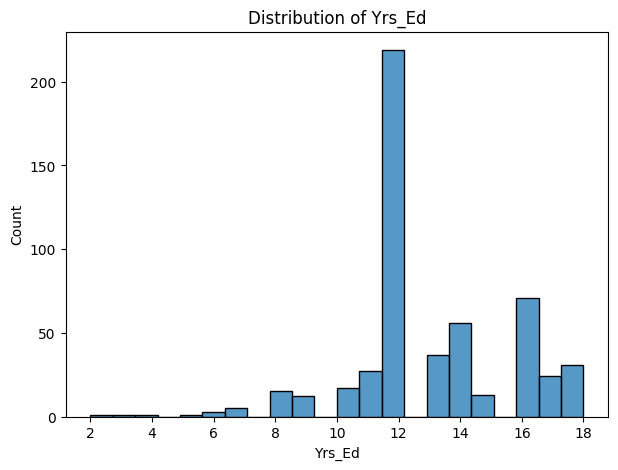

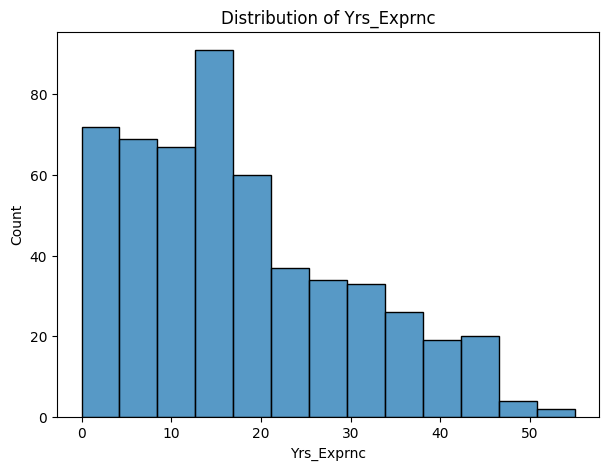

In [8]:
### Show Distribution of Both Years of Eductation and Experience

# Create list of variables to plot
hist_lst = ['Yrs_Ed','Yrs_Exprnc']

# Loop through list and create histograms
for field in hist_lst:

  plt.figure(figsize = (7,5))

  sns.histplot(
      data = Wage_df,
      x = field
  )

  plt.title(f"Distribution of {field}")
  plt.show()
  print() ### Add space between charts


**<u>Notes:</u>**

Seems like Most Individuals in this dataset have between 10 to 20 years worth of work experience, and most have at least 12 years worth of eductation.

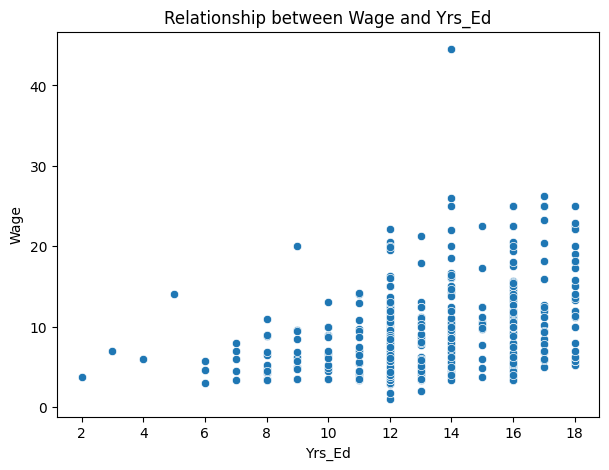

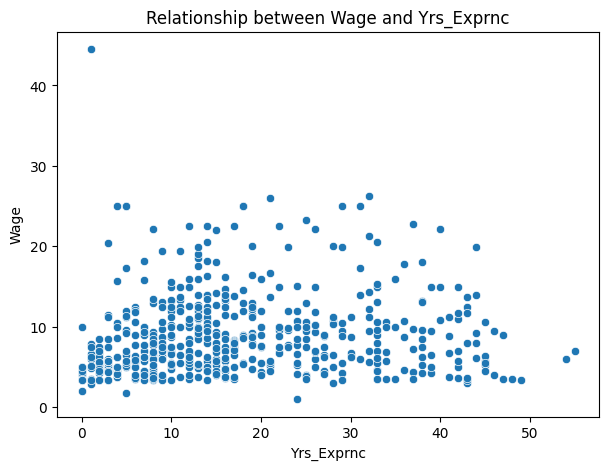

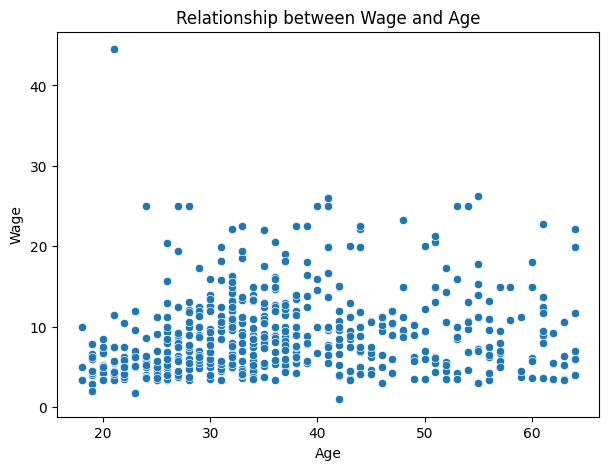

In [9]:
### Relationships Between Wage and various fields
x_values = ['Yrs_Ed','Yrs_Exprnc','Age']
y_value = ['Wage']

### create a cross product list between the 2 variable lists
Scatter_plt_lst = list(product(y_value,x_values))

### Reference each combo within the the new product list
for y,x in Scatter_plt_lst:

  plt.figure(figsize = (7,5))

  sns.scatterplot(
      data = Wage_df,
      x = x,
      y = y,
  )

  plt.title(f"Relationship between {y} and {x}")

  plt.show()
  print()


<u>Notes:</u>

1. When Looking at the relationship between Wage and Yrs_Ed, we generally observe an upward trending relationship, as Years of education increases, so does Wage, generally speaking.

2. When looking at the plot for Wage vs Yrs_Experience, suprisingly we do not see much of a relationship here.

3. When looking at the plot for Wage vs Age, we also don't see much of a significant relationship between the 2

##### Correlation Analysis:

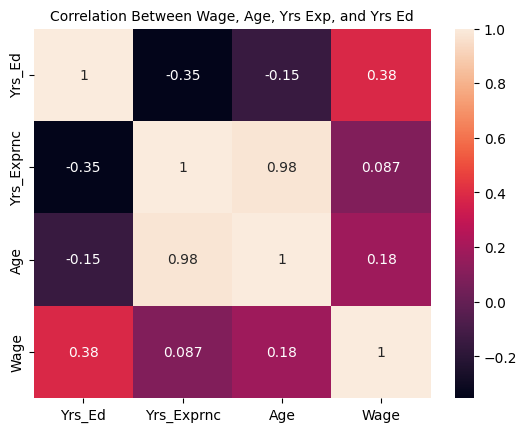

In [10]:
### Show Correlation Matrix to confirm above assumptions
Corr_Vars = ['Yrs_Ed','Yrs_Exprnc','Age','Wage']

sns.heatmap(Wage_df[Corr_Vars].corr(), annot = True)

plt.title("Correlation Between Wage, Age, Yrs Exp, and Yrs Ed", fontsize = 10)
plt.show()

 <u>Notes:</u>

 When Looking at the correlation matrix, we see that Yrs_Ed and Wage have medium positive relationship (0.38), while age and Yrs_Expr both exibit weak, positive relationships with Wage. This confirms the assumptions made in visual analysis.

#### Regression Analysis:

Will Try to predict Wage by regressing this variable against all other variables in the dataset.

##### Prepare the data for modeling:

In [11]:
### View DF
Wage_df.head()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Race,Occup,Sect,Marr
0,8,0,1,21,0,5.10,35,H,Other,Manf,1
1,9,0,1,42,0,4.95,57,W,Other,Manf,1
2,12,0,0,1,0,6.67,19,W,Other,Manf,0
3,12,0,0,4,0,4.00,22,W,Other,Other,0
4,12,0,0,17,0,7.50,35,W,Other,Other,1


<u>Note:</u>

In order to use Race, Occup, and Sector, we need to first convert these variables into dummy variables.

In [12]:
# Set Target Variable
Y = Wage_df['Wage']
# Set X variables sans Object Datatypes and the y (target variable)
X = Wage_df.drop(columns = ['Wage','Race','Occup','Sect'])

In [13]:
# View Variable DFs
Y.head()

,Wage
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [14]:
# View Variable DFs
X.head()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Age,Marr
0,8,0,1,21,0,35,1
1,9,0,1,42,0,57,1
2,12,0,0,1,0,19,0
3,12,0,0,4,0,22,0
4,12,0,0,17,0,35,1


##### Handle Dummy Variables:

In [15]:
### Grab All Categorical Variables
Wage_Cat = Wage_df.select_dtypes(include = ['object'])
# View DF
Wage_Cat

,Race,Occup,Sect
0,H,Other,Manf
1,W,Other,Manf
2,W,Other,Manf
3,W,Other,Other
4,W,Other,Other
...,...,...,...
529,W,Prof,Other
530,O,Prof,Other
531,O,Prof,Other
532,W,Prof,Other


In [33]:
# Convert Fields to dummies (Dropping the first field of each dummy var to avoid dummy variable trap)
Wage_Dummies = pd.get_dummies(
    Wage_Cat,
    dtype = int, ### produce integer dummy variables (1,0)
    drop_first = True ### Drop the first of each dummy variable field
)

In [34]:
# View Dummy DF
Wage_Dummies

,Race_O,Race_W,Occup_Mngmnt,Occup_Other,Occup_Prof,Occup_Sales,Occup_Service,Sect_Manf,Sect_Other
0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1
4,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
529,0,1,0,0,1,0,0,0,1
530,1,0,0,0,1,0,0,0,1
531,1,0,0,0,1,0,0,0,1
532,0,1,0,0,1,0,0,0,1


##### Merge Target and Predictor Variable DFs

In [35]:
### Merge New Dummy Fields with original X DF, then Merge with Y DF

New_X_DF = pd.concat([X,Wage_Dummies], axis = 1) ### Axis = 1 means append column-wise
Wages_Modeling_DF = pd.concat([Y,New_X_DF], axis = 1) ### Axis = 1 means append column-wise

### View Modeling DF
Wages_Modeling_DF

,Wage,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Age,Marr,Race_O,Race_W,Occup_Mngmnt,Occup_Other,Occup_Prof,Occup_Sales,Occup_Service,Sect_Manf,Sect_Other
0,5.10,8,0,1,21,0,35,1,0,0,0,1,0,0,0,1,0
1,4.95,9,0,1,42,0,57,1,0,1,0,1,0,0,0,1,0
2,6.67,12,0,0,1,0,19,0,0,1,0,1,0,0,0,1,0
3,4.00,12,0,0,4,0,22,0,0,1,0,1,0,0,0,0,1
4,7.50,12,0,0,17,0,35,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,11.36,18,0,0,5,0,29,0,0,1,0,0,1,0,0,0,1
530,6.10,12,0,1,33,0,51,1,1,0,0,0,1,0,0,0,1
531,23.25,17,0,1,25,1,48,1,1,0,0,0,1,0,0,0,1
532,19.88,12,1,0,13,1,31,1,0,1,0,0,1,0,0,0,1


##### Fit and Run Multiple Regression Model:

In [36]:
### Using Statsmodel to Produce a regression summary
y_var = Wages_Modeling_DF['Wage']
x_var = Wages_Modeling_DF.drop(columns= ['Wage'])

x_var = sm.add_constant(x_var)

model_sm = sm.OLS(y_var,x_var).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     15.66
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           3.02e-35
Time:                        07:13:31   Log-Likelihood:                -1525.8
No. Observations:                 534   AIC:                             3086.
Df Residuals:                     517   BIC:                             3158.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2814      6.741     -0.042

In [37]:
### Predict Hourly Wage based on model and test inputs
model_sm.predict([1,10,1,1,20,0,21,0,0,1,1,0,0,0,0,0,1])

array([10.31689416])

##### Rerun Model Using Sklearn to calculate needed KPIs

In [40]:
## Running model in Sklearn
model_sk = LinearRegression() # Intercept is automatically generated (This creates a regression object)
model_sk.fit(New_X_DF, Y)
print(f"Incercept (Bo): {model_sk.intercept_}")
print(f"\nCoefficients (B1,B2): {model_sk.coef_}")

Incercept (Bo): -0.2813669924356308

Coefficients (B1,B2): [ 0.81279135 -0.56274247 -1.94252212  0.24484501  1.60168787 -0.15802823
  0.30050151 -0.23136243  0.60650843  3.26819795 -0.02232313  1.93462877
 -0.79564391 -0.70717721  0.56348715 -0.47740163]


In [41]:
#### Create an array of prediction values
y_hat = model_sk.predict(New_X_DF)

In [64]:
### Show Residual amt between Y and Yhat
Resid = y_hat - Y

##### Calculate RMSE, MAE, and MAPE

In [67]:
### MAE (By Hand)
MAE = np.average(np.abs(Resid))

print(f"MAE: {MAE}")

MAE: 2.9883064940778947


In [73]:
### MAE (Sklearn Method)
mean_absolute_error(Y,y_hat)

2.9883064940778947

In [66]:
### MAPE (by hand)
MAPE = np.average(np.abs((Resid)/Y))

print(f"MAPE: {MAPE}")

MAPE: 0.4068745211228584


In [76]:
### MAPE (Sklearn Method)
mean_absolute_percentage_error(Y,y_hat)

0.4068745211228584

In [65]:
### RMSE (By Hand)
RMSE = np.sqrt(np.average((Resid)*(Resid)))

print(f"RMSE: {RMSE}")

RMSE: 4.213582832569984


In [79]:
### RMSE (Sklearn Method)
root_mean_squared_error(Y,y_hat)

4.213582832569984

In [68]:
#### R^2 (By Hand)
R2_Hand = 1 - (np.sum((Y - y_hat)**2) / np.sum((Y - np.mean(Y))**2))

print(f"R^2 Value: {R2_Hand}")

R^2 Value: 0.32649082803385066


In [80]:
### R^2 (Using Sklearn)
r2_score(Y,y_hat)

0.32649082803385066

In [81]:
### Total Unexplained Variance
1 - R2_Hand

np.float64(0.6735091719661493)

#### **Takeaways:**

After reviewing the results of the Statsmodel table, we see that:

* The overall R^2 of the model sits at 0.326, suggesting that just over 32% of the variation is being explained by the model. It should be noted that the adjusted R^2 sits a little lower, at 0.306. Adjusted R^2 removes inflation that R^2 doesn't normally account for, which is caused by having a large amount of predictor variables (as we do here).

* Sex, Union, Occup_Mngmnt, and Occup_Prof have the only statistically significant coefficents with respect to wage (0.000, 0,002, 0,000, and 0,004). This was quite suprising, as we saw earlier that Years Education does have a sizeable relationship with Wage.

* For most of the non statisitcally significant beta coefficients, their related standard errors and confidence intervals are fairly wide.

* If we observe the regression notes we in note 2: "condition number is large, indicating either strong multicolinearity or other numerical problems."
  * From a multicolinearity perspective, I suspect that age and Yrs_Exprnc may be the culprits, as generally speaking, the older you are, the more work experience you will have, and visa-versa, making these variables dependent on each other. To confirm this, I would probably use the VIF method to test for multicollinearity amongst my predictor variables.

  * I think another issue here may arise from numerical scaling: Our Dummy Variables are binary (0,1), while other variables such as Age, Yrs_Exprnc, and Years_Edc are integers that can range from 0 to infinity. Since a regression formula as a whole can be thought of as the sum of the weighted averages of the betas and xi, it may be incorrectly applying more weigth to the non-dummy variable fields simply due to them being much larger numbers than their dummy variable counterparts. As such, a scaling technique should be used to address this issue.

<Axes: xlabel='Age', ylabel='Yrs_Exprnc'>

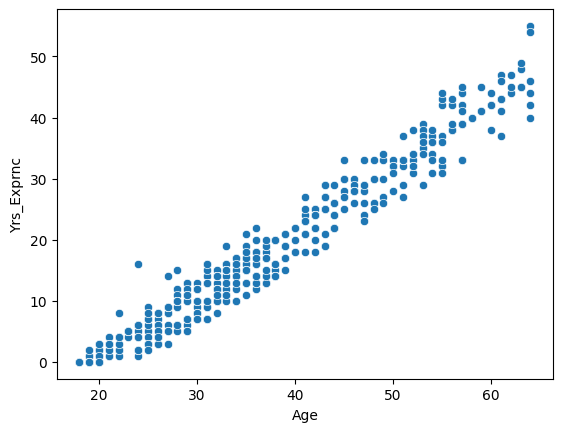

In [83]:
### Post look at age vs Years of experience
sns.scatterplot(
    data = Wage_df,
    x = 'Age',
    y = 'Yrs_Exprnc'
)

### Basically a perfect linear relationship